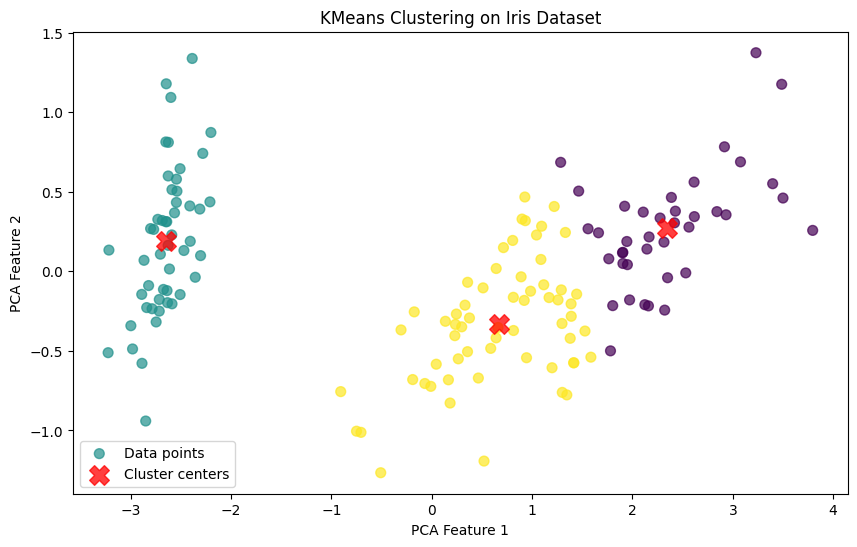

Cluster centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
Cluster labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X)

# Predict the cluster for each data point
y_kmeans = kmeans.predict(X)

# Add the cluster centers to the plot
centers = kmeans.cluster_centers_

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7, label='Data points')

# Plot cluster centers
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster centers')

plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

# Print results
print("Cluster centers:\n", centers)
print("Cluster labels:\n", y_kmeans)


The accuracy score of K-Mean: 0.24
The accuracy score of EM: 0.3333333333333333


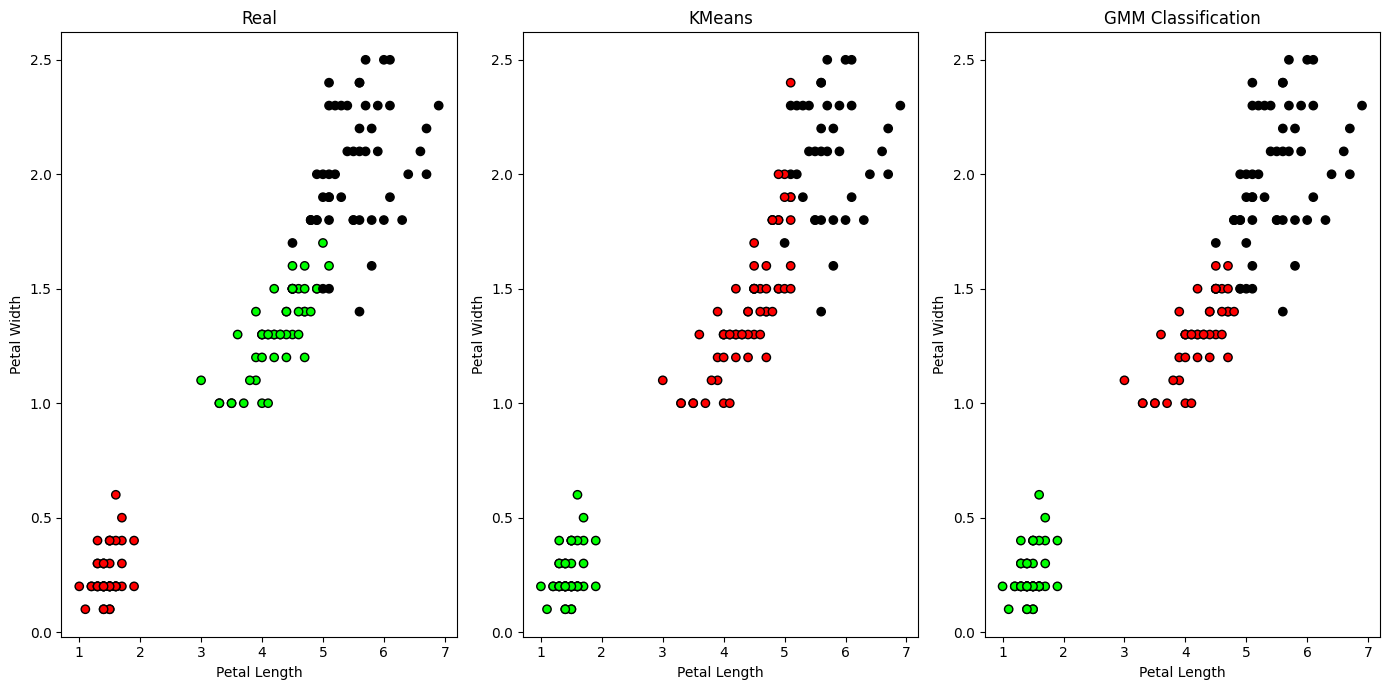

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define colormap for plotting
colormap = np.array(['red', 'lime', 'black'])

plt.figure(figsize=(14, 7))

# Plot the real classification
plt.subplot(1, 3, 1)
plt.title('Real')
plt.scatter(X[:, 2], X[:, 3], c=colormap[y], edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# Plot KMeans clustering results
plt.subplot(1, 3, 2)
plt.title('KMeans')
plt.scatter(X[:, 2], X[:, 3], c=colormap[kmeans_labels], edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Evaluate KMeans clustering
kmeans_accuracy = metrics.accuracy_score(y, kmeans_labels)
print('The accuracy score of K-Mean:', kmeans_accuracy)

gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)
gmm_labels = gmm.predict(X)

plt.subplot(1, 3, 3)
plt.title('GMM Classification')
plt.scatter(X[:, 2], X[:, 3], c=colormap[gmm_labels], edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Evaluate GMM clustering
gmm_accuracy = metrics.accuracy_score(y, gmm_labels)
print('The accuracy score of EM:', gmm_accuracy)

plt.tight_layout()
plt.show()
